# Lektion 4: Python Walkthrough - Sampling
## Anvendt Statistik for Erhvervsøkonomer

---

**Indhold:**
1. Python Data Structures (Lists vs Series vs DataFrame)
2. Randomness & Reproducibility
3. Working with Real Data
4. Simple Random Sampling
5. Stratified Random Sampling
6. Cluster Sampling
7. Summary

In [1]:
# Import nødvendige libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sæt plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Pakker importeret!")

✓ Pakker importeret!


---
## DEL 0: PYTHON DATA STRUKTURER
---

**Problem mange studerende oplever:**
```python
data = [1, 2, 4, 5, 6]
data.mean()  # ❌ AttributeError!
```

**Hvorfor?** Lists "ved ikke" at de indeholder tal til statistik.

### 0.1: Fra Matematik til Python

**Tre måder at holde data i Python:**

In [2]:
# Vi har disse tal: 2, 4, 6, 8, 10
# Opgave: Beregn mean, median, std

# Måde 1: Python list (grundlæggende container)
data_list = [2, 4, 6, 8, 10]

print("Data som list:")
print(data_list)
print(f"Type: {type(data_list)}")

# Hvad kan vi gøre?
print(f"Længde: {len(data_list)}")
print(f"Sum: {sum(data_list)}")
print(f"Første element: {data_list[0]}")

# Hvad kan vi IKKE gøre?
# data_list.mean()  # ❌ Dette virker ikke!
# data_list.std()   # ❌ Dette virker ikke!

Data som list:
[2, 4, 6, 8, 10]
Type: <class 'list'>
Længde: 5
Sum: 30
Første element: 2


### 0.2: Tre Løsninger - Samme Mål

In [3]:
# ✅ LØSNING 1: Brug numpy funktioner på listen
mean_np_func = np.mean(data_list)
std_np_func = np.std(data_list, ddof=1)  # ddof=1 for sample std

print("LØSNING 1: numpy funktioner")
print(f"Mean: {mean_np_func}")
print(f"Std: {std_np_func:.2f}")
print()

LØSNING 1: numpy funktioner
Mean: 6.0
Std: 3.16



In [4]:
# ✅ LØSNING 2: Konverter til numpy array
data_array = np.array(data_list)

mean_array = data_array.mean()
std_array = data_array.std(ddof=1)

print("LØSNING 2: numpy array")
print(f"Type: {type(data_array)}")
print(f"Mean: {mean_array}")
print(f"Std: {std_array:.2f}")
print()

LØSNING 2: numpy array
Type: <class 'numpy.ndarray'>
Mean: 6.0
Std: 3.16



In [5]:
# ✅ LØSNING 3: Konverter til pandas Series (ANBEFALET)
data_series = pd.Series(data_list)

mean_series = data_series.mean()
median_series = data_series.median()
std_series = data_series.std()

print("LØSNING 3: pandas Series (ANBEFALET til statistik)")
print(f"Type: {type(data_series)}")
print(f"Mean: {mean_series}")
print(f"Median: {median_series}")
print(f"Std: {std_series:.2f}")
print()

# Bonus: Pandas giver også describe()
print("Bonus - .describe():")
print(data_series.describe())

LØSNING 3: pandas Series (ANBEFALET til statistik)
Type: <class 'pandas.Series'>
Mean: 6.0
Median: 6.0
Std: 3.16

Bonus - .describe():
count     5.000000
mean      6.000000
std       3.162278
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
dtype: float64


### 0.3: Sammenligning

| Data Structure | `.mean()` virker? | God til statistik? | Bruges i kurset |
|----------------|-------------------|--------------------|-----------------|
| `list`         | ❌                | ❌                 | Sjældent        |
| `numpy array`  | ✅                | ✅                 | Nogle gange     |
| `pandas Series`| ✅                | ✅✅               | **OFTEST**      |

### 0.4: Decision Framework for Dette Kursus

**Tommelfingerregel:**

In [6]:
# Scenarie 1: Du har en liste med tal fra opgaven
opgave_data = [12, 15, 18, 14, 16, 19, 13]

# ✅ KONVERTER TIL SERIES:
opgave_series = pd.Series(opgave_data)

# Nu kan du bruge alle statistiske funktioner
print(f"Mean: {opgave_series.mean()}")
print(f"Std: {opgave_series.std():.2f}")
print(f"Median: {opgave_series.median()}")

Mean: 15.285714285714286
Std: 2.56
Median: 15.0


In [7]:
# Scenarie 2: Du arbejder med én kolonne fra et DataFrame
# (Vi ser dette senere med SoMe data)

# Eksempel:
# engagement_rate = df['engagement_rate']  # ← Dette ER allerede en Series!
# engagement_rate.mean()  # ✅ Virker direkte

**💡 TIL JERES OPGAVER:**
- Har I en liste? → `pd.Series([1, 2, 3, 4, 5])`
- Så kan I bruge `.mean()`, `.std()`, `.median()`, osv.

---
## DEL 1: RANDOMNESS & REPRODUCIBILITY (Tilfældighed i Python)
---

### 1.1: Pseudorandom Numbers

In [8]:
# Computere kan ikke lave ægte tilfældighed - de bruger algoritmer
# Hver gang du kører, får du nye tal

random_numbers_1 = np.random.normal(loc=100, scale=15, size=5)
print("Første kørsel:")
print(random_numbers_1)

random_numbers_2 = np.random.normal(loc=100, scale=15, size=5)
print("\nAnden kørsel:")
print(random_numbers_2)

print("\n→ Tallene er forskellige hver gang!")

Første kørsel:
[109.09893417  50.12190728  91.00483137  89.92784836  91.78102153]

Anden kørsel:
[98.47120604 89.53321504 88.55694389 73.65292851 75.47103726]

→ Tallene er forskellige hver gang!


### 1.2: Seeds for Reproducerbarhed

In [9]:
# En seed er et startnummer for algoritmen
# Samme seed → samme sekvens af "tilfældige" tal

# Første kørsel med seed=42
np.random.seed(42)
random_with_seed_1 = np.random.normal(loc=100, scale=15, size=5)
print("Kørsel 1 (seed=42):")
print(random_with_seed_1)

# Anden kørsel med seed=42
np.random.seed(42)
random_with_seed_2 = np.random.normal(loc=100, scale=15, size=5)
print("\nKørsel 2 (seed=42):")
print(random_with_seed_2)

print("\n→ Tallene er identiske! Dette er reproducerbart.")

Kørsel 1 (seed=42):
[107.4507123   97.92603548 109.71532807 122.84544785  96.48769938]

Kørsel 2 (seed=42):
[107.4507123   97.92603548 109.71532807 122.84544785  96.48769938]

→ Tallene er identiske! Dette er reproducerbart.


### 1.3: random_state Parameter

**I pandas bruges `random_state` i stedet for `np.random.seed()`:**

In [10]:
# Opret en simpel Series
numbers = pd.Series(range(1, 11))  # [1, 2, 3, ..., 10]

# Tag sample MED random_state (reproducerbart)
sample1 = numbers.sample(n=5, random_state=42)
sample2 = numbers.sample(n=5, random_state=42)

print("Sample 1 (random_state=42):")
print(sample1.values)

print("\nSample 2 (random_state=42):")
print(sample2.values)

print("\n→ Identiske samples!")

# Tag sample UDEN random_state (ikke reproducerbart)
sample3 = numbers.sample(n=5)
sample4 = numbers.sample(n=5)

print("\nSample 3 (ingen random_state):")
print(sample3.values)

print("\nSample 4 (ingen random_state):")
print(sample4.values)

print("\n→ Forskellige samples hver gang!")

Sample 1 (random_state=42):
[9 2 6 1 8]

Sample 2 (random_state=42):
[9 2 6 1 8]

→ Identiske samples!

Sample 3 (ingen random_state):
[ 1  7 10  2  9]

Sample 4 (ingen random_state):
[6 3 8 7 9]

→ Forskellige samples hver gang!


**💡 Hvornår bruger vi random_state?**
- I undervisning/øvelser: Brug `random_state` så alle får samme resultater
- I rigtig forskning: Brug `random_state` for reproducerbarhed
- Ved simulationer: Brug forskellige seeds for forskellige samples

---
## DEL 2: SoMe Data og Sampling
---

### 2.1: Indlæs Vores Population Dataset

In [33]:
# Indlæs social media engagement data
df_some = pd.read_csv('https://raw.githubusercontent.com/aaubs/AnvendtStatistik2026/main/Data/social_media_engagement_enhanced.csv')

print("Vores Population Dataset:")
print(f"Størrelse: {len(df_some)} influencer accounts")
print(f"\nVariabler: {list(df_some.columns)}")
print(f"\nFørste observationer:")
print(df_some.head())

Vores Population Dataset:
Størrelse: 60 influencer accounts

Variabler: ['influencer_id', 'category', 'followers', 'avg_likes', 'avg_comments', 'posts_per_week', 'engagement_rate', 'platform']

Første observationer:
  influencer_id category  followers  avg_likes  avg_comments  posts_per_week  \
0          I001     Tech       5919        293            51             4.9   
1          I002     Food       5232        177            31             5.4   
2          I003   Travel       9322        316            55             4.5   
3          I004     Tech       1843         79            13             5.2   
4          I005   Gaming       7949        354            62             5.4   

   engagement_rate   platform  
0             5.84  Instagram  
1             4.00  Instagram  
2             4.00  Instagram  
3             5.05  Instagram  
4             5.24  Instagram  


In [12]:
# Grundlæggende beskrivende statistik for populationen
print("Population Parameters (True Values):")
print("="*60)

# Engagement rate
pop_mean_engagement = df_some['engagement_rate'].mean()
pop_std_engagement = df_some['engagement_rate'].std()
pop_median_engagement = df_some['engagement_rate'].median()

print(f"Engagement Rate:")
print(f"  μ (mean):   {pop_mean_engagement:.3f}%")
print(f"  σ (std):    {pop_std_engagement:.3f}%")
print(f"  Median:     {pop_median_engagement:.3f}%")

print(f"\nKategori fordeling:")
print(df_some['category'].value_counts())

print(f"\nPlatform fordeling:")
print(df_some['platform'].value_counts())

Population Parameters (True Values):
Engagement Rate:
  μ (mean):   4.268%
  σ (std):    1.716%
  Median:     4.610%

Kategori fordeling:
category
Food              12
Fitness           12
Tech              10
Gaming             6
Beauty             6
Fashion            6
Travel             4
Sustainability     4
Name: count, dtype: int64

Platform fordeling:
platform
Instagram    30
TikTok       30
Name: count, dtype: int64


### 2.2: Strategi for Synthetic vs Real Data

**I denne notebook bruger vi BÅDE:**

**1. Synthetic data** (kunstig population med `np.random.normal()`):
- Vi kender de sande parametre (μ, σ)
- Vi kan se præcis hvor godt vores samples estimerer
- God til at forstå **sampling error koncepter**

**2. "Virkelig" data** (SoMe dataset):
- Vi kender IKKE de sande parametre (fordi vi kun har én "population")
- Men dette er **realistisk** - sådan er forskning i praksis
- God til at se **anvendelse i praksis**

**→ Begge bruges til forskellige pædagogiske formål!**

---
## DEL 3: SIMPLE RANDOM SAMPLING
---

### 3.1: Concept - Simple Random Sample

**Implementering i Python:**

In [13]:
# Tag en simple random sample fra vores SoMe data
n_sample = 20  # Sample size

# Tag sample med .sample()
simple_sample = df_some.sample(n=n_sample, random_state=42)

print(f"Sample size: {len(simple_sample)}")
print(f"\nSample data:")
print(simple_sample[['influencer_id', 'category', 'engagement_rate']].head(10))

Sample size: 20

Sample data:
   influencer_id        category  engagement_rate
0           I001            Tech             5.84
5           I006  Sustainability             5.50
36          T007  Sustainability             5.80
45          T016         Fashion             4.66
13          I014         Fashion             4.67
54          T025         Fashion             6.10
33          T004          Gaming             5.79
48          T019          Beauty             3.32
12          I013            Food             4.66
57          T028            Tech             7.81


In [14]:
# Sammenlign sample statistics med population parameters
sample_mean = simple_sample['engagement_rate'].mean()
sample_std = simple_sample['engagement_rate'].std()

print("POPULATION vs SAMPLE:")
print("="*60)
print(f"{'Measure':<15} {'Population (μ/σ)':<20} {'Sample (x̄/s)':<20} {'Difference'}")
print("-"*60)
print(f"{'Mean':<15} {pop_mean_engagement:<20.3f} {sample_mean:<20.3f} {abs(pop_mean_engagement - sample_mean):.3f}")
print(f"{'Std Dev':<15} {pop_std_engagement:<20.3f} {sample_std:<20.3f} {abs(pop_std_engagement - sample_std):.3f}")

print(f"\n→ Sample statistikken er tæt på, men ikke identisk med population parametrene")
print(f"→ Denne forskel kaldes SAMPLING ERROR")

POPULATION vs SAMPLE:
Measure         Population (μ/σ)     Sample (x̄/s)        Difference
------------------------------------------------------------
Mean            4.268                5.127                0.859
Std Dev         1.716                1.308                0.408

→ Sample statistikken er tæt på, men ikke identisk med population parametrene
→ Denne forskel kaldes SAMPLING ERROR


### 3.2: Understanding Sampling Error - Multiple Samples

**Vi tager nu 100 forskellige samples for at se variationen:**

In [15]:
# Tag 100 forskellige samples og beregn deres means
num_simulations = 100
sample_size = 20

sample_means = []

for i in range(num_simulations):
    # Tag et nyt sample med forskellig seed hver gang
    sample = df_some.sample(n=sample_size, random_state=i)
    sample_mean = sample['engagement_rate'].mean()
    sample_means.append(sample_mean)

# Konverter til Series for nem analyse
sample_means_series = pd.Series(sample_means)

print(f"Fordeling af {num_simulations} sample means:")
print("="*60)
print(f"Mean of sample means: {sample_means_series.mean():.3f}%")
print(f"Std of sample means:  {sample_means_series.std():.3f}%")
print(f"Min sample mean:      {sample_means_series.min():.3f}%")
print(f"Max sample mean:      {sample_means_series.max():.3f}%")
print(f"\nTrue population mean: {pop_mean_engagement:.3f}%")

Fordeling af 100 sample means:
Mean of sample means: 4.263%
Std of sample means:  0.328%
Min sample mean:      3.461%
Max sample mean:      5.127%

True population mean: 4.268%


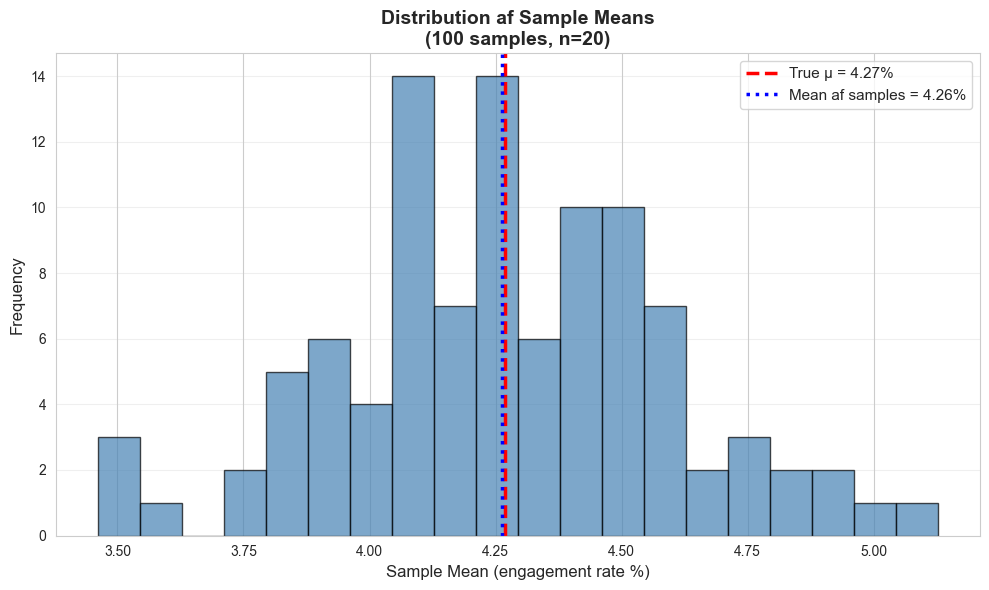

→ Sample means cluster omkring den sande population mean
→ Men der er spredning - dette er sampling error!


In [16]:
# Visualiser fordelingen af sample means
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(sample_means, bins=20, alpha=0.7, color='steelblue', edgecolor='black')
ax.axvline(pop_mean_engagement, color='red', linestyle='--', linewidth=2.5, 
           label=f'True μ = {pop_mean_engagement:.2f}%')
ax.axvline(sample_means_series.mean(), color='blue', linestyle=':', linewidth=2.5, 
           label=f'Mean af samples = {sample_means_series.mean():.2f}%')

ax.set_xlabel('Sample Mean (engagement rate %)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title(f'Distribution af Sample Means\n({num_simulations} samples, n={sample_size})', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("→ Sample means cluster omkring den sande population mean")
print("→ Men der er spredning - dette er sampling error!")

### 3.3: Effect of Sample Size on Sampling Error

**Større samples → mindre sampling error**

In [17]:
# Test forskellige sample sizes
sample_sizes = [5, 10, 20, 30, 40, 50]

results = []

for n in sample_sizes:
    sample = df_some.sample(n=n, random_state=42)
    sample_mean = sample['engagement_rate'].mean()
    error = abs(sample_mean - pop_mean_engagement)
    
    results.append({
        'n': n,
        'sample_mean': sample_mean,
        'error': error
    })

results_df = pd.DataFrame(results)

print("Effect of Sample Size on Sampling Error:")
print("="*60)
print(f"True population mean μ = {pop_mean_engagement:.3f}%")
print()
print(results_df.to_string(index=False))
print()
print("→ Større n → mindre error (generelt)")
print("→ Men ikke lineært - diminishing returns!")

Effect of Sample Size on Sampling Error:
True population mean μ = 4.268%

 n  sample_mean    error
 5     5.294000 1.025833
10     5.415000 1.146833
20     5.127500 0.859333
30     4.729667 0.461500
40     4.466500 0.198333
50     4.360600 0.092433

→ Større n → mindre error (generelt)
→ Men ikke lineært - diminishing returns!


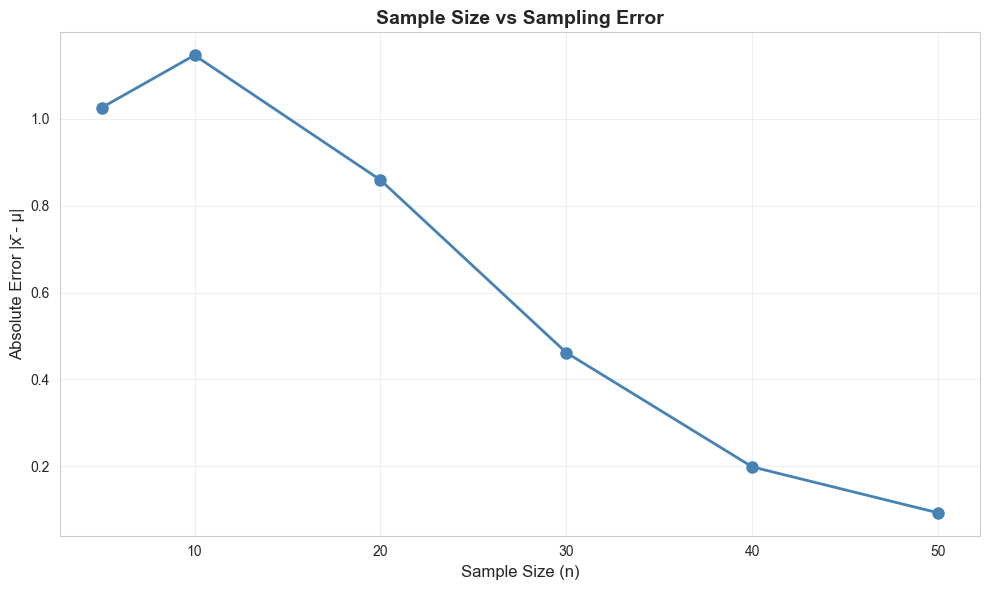

In [18]:
# Visualiser relationship mellem sample size og error
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(results_df['n'], results_df['error'], marker='o', linewidth=2, markersize=8, color='steelblue')
ax.set_xlabel('Sample Size (n)', fontsize=12)
ax.set_ylabel('Absolute Error |x̄ - μ|', fontsize=12)
ax.set_title('Sample Size vs Sampling Error', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## DEL 4: STRATIFIED RANDOM SAMPLING
---

### 4.1: Implementering - Step-by-Step

**Strategi: Sample fra hver kategori proportionalt**

In [19]:
# STEP 1: Beregn proportioner for hver kategori
print("STEP 1: Kategori proportioner i population")
print("="*60)

strata_proportions = df_some['category'].value_counts(normalize=True)
print(strata_proportions)
print()

STEP 1: Kategori proportioner i population
category
Food              0.200000
Fitness           0.200000
Tech              0.166667
Gaming            0.100000
Beauty            0.100000
Fashion           0.100000
Travel            0.066667
Sustainability    0.066667
Name: proportion, dtype: float64



In [20]:
# STEP 2: Beregn sample sizes per kategori
total_sample_size = 30  # Vi vil sample ~50% af data (30 ud af 60)

# Proportional allocation
sample_sizes_float = strata_proportions * total_sample_size
sample_sizes = sample_sizes_float.round().astype(int)

# Adjust hvis sum ikke er præcis (pga. rounding)
diff = total_sample_size - sample_sizes.sum()
if diff != 0:
    # Tilføj/træk fra det største stratum
    largest_stratum = sample_sizes.idxmax()
    sample_sizes[largest_stratum] += diff

print("STEP 2: Sample sizes per kategori (proportional)")
print("="*60)
print(sample_sizes)
print(f"\nSum: {sample_sizes.sum()} (target: {total_sample_size})")
print()

STEP 2: Sample sizes per kategori (proportional)
category
Food              6
Fitness           6
Tech              5
Gaming            3
Beauty            3
Fashion           3
Travel            2
Sustainability    2
Name: proportion, dtype: int64

Sum: 30 (target: 30)



In [21]:
# STEP 3: Sample fra hver kategori EN AD GANGEN (explicit loop)
print("STEP 3: Sampling fra hver kategori")
print("="*60)

stratified_samples = []  # Tom liste til at holde samples

for category_name in df_some['category'].unique():
    print(f"\nProcessing: {category_name}")
    
    # Filter data for denne kategori
    category_data = df_some[df_some['category'] == category_name]
    print(f"  Population size: {len(category_data)}")
    
    # Hvor mange skal vi sample fra denne kategori?
    n_to_sample = sample_sizes[category_name]
    print(f"  Will sample: {n_to_sample}")
    
    # Tag sample fra denne kategori
    category_sample = category_data.sample(n=n_to_sample, random_state=42)
    
    # Tilføj til vores liste
    stratified_samples.append(category_sample)
    print(f"  ✓ Sampled {len(category_sample)} accounts")

print("\n" + "="*60)

STEP 3: Sampling fra hver kategori

Processing: Tech
  Population size: 10
  Will sample: 5
  ✓ Sampled 5 accounts

Processing: Food
  Population size: 12
  Will sample: 6
  ✓ Sampled 6 accounts

Processing: Travel
  Population size: 4
  Will sample: 2
  ✓ Sampled 2 accounts

Processing: Gaming
  Population size: 6
  Will sample: 3
  ✓ Sampled 3 accounts

Processing: Sustainability
  Population size: 4
  Will sample: 2
  ✓ Sampled 2 accounts

Processing: Fitness
  Population size: 12
  Will sample: 6
  ✓ Sampled 6 accounts

Processing: Beauty
  Population size: 6
  Will sample: 3
  ✓ Sampled 3 accounts

Processing: Fashion
  Population size: 6
  Will sample: 3
  ✓ Sampled 3 accounts



In [22]:
# STEP 4: Kombiner alle samples til ét DataFrame
print("STEP 4: Kombiner samples")
print("="*60)

stratified_sample = pd.concat(stratified_samples, ignore_index=True)

print(f"Total sample size: {len(stratified_sample)}")
print(f"\nSample fordeling:")
print(stratified_sample['category'].value_counts().sort_index())

STEP 4: Kombiner samples
Total sample size: 30

Sample fordeling:
category
Beauty            3
Fashion           3
Fitness           6
Food              6
Gaming            3
Sustainability    2
Tech              5
Travel            2
Name: count, dtype: int64


### 4.2: Verification - Er Proportionerne Bevaret?

In [47]:
# Sammenlign population vs sample proportioner
pop_proportions = df_some['category'].value_counts(normalize=True).sort_index()
sample_proportions = stratified_sample['category'].value_counts(normalize=True).sort_index()

comparison = pd.DataFrame({
    'Population': pop_proportions,
    'Sample': sample_proportions,
    'Difference': abs(pop_proportions - sample_proportions)
})

print("Population vs Sample Proportioner:")
print("="*60)
print(comparison)

Population vs Sample Proportioner:
                Population    Sample  Difference
category                                        
Beauty            0.100000  0.100000         0.0
Fashion           0.100000  0.100000         0.0
Fitness           0.200000  0.200000         0.0
Food              0.200000  0.200000         0.0
Gaming            0.100000  0.100000         0.0
Sustainability    0.066667  0.066667         0.0
Tech              0.166667  0.166667         0.0
Travel            0.066667  0.066667         0.0


### 4.3: Sammenligning - Stratified vs Simple Random

In [49]:
# Tag en simple random sample af samme størrelse
simple_random_sample = df_some.sample(n=30, random_state=42)

# Sammenlign kategori fordeling
print("Kategori Fordeling - Sammenligning:")
print("="*60)
print("\nPopulation (true proportions):")
print(df_some['category'].value_counts(normalize=True).sort_index())

print("\nStratified Sample:")
print(stratified_sample['category'].value_counts(normalize=True).sort_index())

print("\nSimple Random Sample:")
print(simple_random_sample['category'].value_counts(normalize=True).sort_index())

print("\n→ Stratified: Garanterer repræsentation fra alle kategorier")
print("→ Simple Random: Kan være skævt (tilfældigt)")

Kategori Fordeling - Sammenligning:

Population (true proportions):
category
Beauty            0.100000
Fashion           0.100000
Fitness           0.200000
Food              0.200000
Gaming            0.100000
Sustainability    0.066667
Tech              0.166667
Travel            0.066667
Name: proportion, dtype: float64

Stratified Sample:
category
Beauty            0.100000
Fashion           0.100000
Fitness           0.200000
Food              0.200000
Gaming            0.100000
Sustainability    0.066667
Tech              0.166667
Travel            0.066667
Name: proportion, dtype: float64

Simple Random Sample:
category
Beauty            0.100000
Fashion           0.166667
Fitness           0.100000
Food              0.166667
Gaming            0.133333
Sustainability    0.066667
Tech              0.200000
Travel            0.066667
Name: proportion, dtype: float64

→ Stratified: Garanterer repræsentation fra alle kategorier
→ Simple Random: Kan være skævt (tilfældigt)


---
## DEL 5: CLUSTER SAMPLING
---

### 5.1: Hvorfor SoMe Data Ikke Virker for Cluster Sampling

**Cluster sampling bruges når:**
- Du har MANGE små clusters (f.eks. 20+ byer med 15-30 accounts hver)
- Det er dyrt/svært at besøge alle clusters (geografisk spredning)
- Men billigt at måle alle i én cluster når du er der

**→ Vi bruger derfor syntetisk data til dette eksempel**

**Population:**
- 500 danske Instagram influencers
- Fordelt over 20 danske byer (clusters)
- Hver by har 20-30 influencers
- Dyrt at rejse til alle byer for dataindsamling

**Cluster Sampling Løsning:**
- Vælg tilfældigt 5 byer
- Indsaml data fra ALLE influencers i de valgte byer

In [35]:
danish_cities = [
    'København', 'Aarhus', 'Odense', 'Aalborg', 'Esbjerg',
    'Randers', 'Kolding', 'Horsens', 'Vejle', 'Roskilde',
    'Herning', 'Silkeborg', 'Næstved', 'Fredericia', 'Viborg',
    'Køge', 'Holstebro', 'Taastrup', 'Slagelse', 'Hillerød'
]

print(f"Antal byer (clusters): {len(danish_cities)}")
print(f"Byer: {', '.join(danish_cities[:10])}...")
print()


Antal byer (clusters): 20
Byer: København, Aarhus, Odense, Aalborg, Esbjerg, Randers, Kolding, Horsens, Vejle, Roskilde...



In [36]:
# Generer population data
np.random.seed(42)

cluster_pop_data = []

for city in danish_cities:
    # Hver by har forskelligt antal influencers (20-30)
    n_influencers = np.random.randint(20, 31)
    
    # Hver by har lidt forskellige engagement patterns
    # Dette simulerer at influencers i samme by kan være mere ens
    city_base_engagement = np.random.uniform(3.0, 6.0)
    
    for i in range(n_influencers):
        # Engagement rate for denne influencer
        # Noget variation omkring byens gennemsnit
        engagement = np.random.normal(
            loc=city_base_engagement,
            scale=1.2
        )
        # Sikr at engagement er positiv
        engagement = max(0.5, min(engagement, 15.0))
        
        cluster_pop_data.append({
            'influencer_id': f'{city}_{i+1:03d}',
            'city': city,
            'engagement_rate': engagement
        })


In [37]:
# Opret DataFrame
df_cluster_pop = pd.DataFrame(cluster_pop_data)

print("Synthetic Population Oprettet:")
print("="*60)
print(f"Total antal influencers: {len(df_cluster_pop)}")
print(f"Antal clusters (byer): {df_cluster_pop['city'].nunique()}")
print(f"\nInfluencers per by:")
print(df_cluster_pop['city'].value_counts().sort_index())

Synthetic Population Oprettet:
Total antal influencers: 486
Antal clusters (byer): 20

Influencers per by:
city
Aalborg       30
Aarhus        28
Esbjerg       26
Fredericia    26
Herning       25
Hillerød      28
Holstebro     20
Horsens       20
Kolding       25
København     26
Køge          21
Næstved       27
Odense        24
Randers       22
Roskilde      24
Silkeborg     22
Slagelse      23
Taastrup      20
Vejle         20
Viborg        29
Name: count, dtype: int64


In [38]:
# Populations parametre ("sande" værdier)

pop_mean_cluster = df_cluster_pop['engagement_rate'].mean()
pop_std_cluster = df_cluster_pop['engagement_rate'].std()

print(f"\n" + "="*60)
print("Population Parameters (True Values):")
print("="*60)
print(f"True population mean (μ): {pop_mean_cluster:.3f}%")
print(f"True population std (σ):  {pop_std_cluster:.3f}%")
print()


Population Parameters (True Values):
True population mean (μ): 4.865%
True population std (σ):  1.415%



### 5.2: Implementering - Step by Step

In [40]:
# STEP 1: Vælg tilfældigt clusters (byer)
num_clusters_to_select = 5  # Vælg 5 byer (matches slides example)

np.random.seed(42)
selected_cities = np.random.choice(
    danish_cities, 
    size=num_clusters_to_select, 
    replace=False
)

print("STEP 1: Vælg tilfældige clusters")
print("-"*60)
print(f"Antal byer at vælge: {num_clusters_to_select}")
print(f"Valgte byer (tilfældigt udvalgt): {', '.join(selected_cities)}")
print()


STEP 1: Vælg tilfældige clusters
------------------------------------------------------------
Antal byer at vælge: 5
Valgte byer (tilfældigt udvalgt): København, Taastrup, Køge, Aarhus, Vejle



In [41]:
# STEP 2: Inkludér ALLE influencers fra de valgte byer
cluster_sample = df_cluster_pop[df_cluster_pop['city'].isin(selected_cities)]

print("STEP 2: Inkludér ALLE fra valgte byer")
print("-"*60)
print(f"Total sample size: {len(cluster_sample)} influencers")
print(f"\nFordeling per by i sample:")
print(cluster_sample['city'].value_counts().sort_index())
print()

# Beregn sample statistics
cluster_sample_mean = cluster_sample['engagement_rate'].mean()
cluster_sample_std = cluster_sample['engagement_rate'].std()

print("="*60)
print("CLUSTER SAMPLE STATISTICS:")
print("="*60)
print(f"Sample mean (x̄):  {cluster_sample_mean:.3f}%")
print(f"Sample std (s):   {cluster_sample_std:.3f}%")
print(f"\nPopulation mean (μ): {pop_mean_cluster:.3f}%")
print(f"Sampling error:      {abs(cluster_sample_mean - pop_mean_cluster):.3f}%")
print()

print("→ Vores sample består af {:.1f}% af den totale population".format(
    100 * len(cluster_sample) / len(df_cluster_pop)
))
print(f"→ Men vi besøgte kun {num_clusters_to_select} ud af {len(danish_cities)} byer!")

STEP 2: Inkludér ALLE fra valgte byer
------------------------------------------------------------
Total sample size: 115 influencers

Fordeling per by i sample:
city
Aarhus       28
København    26
Køge         21
Taastrup     20
Vejle        20
Name: count, dtype: int64

CLUSTER SAMPLE STATISTICS:
Sample mean (x̄):  5.104%
Sample std (s):   1.405%

Population mean (μ): 4.865%
Sampling error:      0.239%

→ Vores sample består af 23.7% af den totale population
→ Men vi besøgte kun 5 ud af 20 byer!


### 5.3: Step 3: Visualisering - Hvilke Byer Blev Valgt?

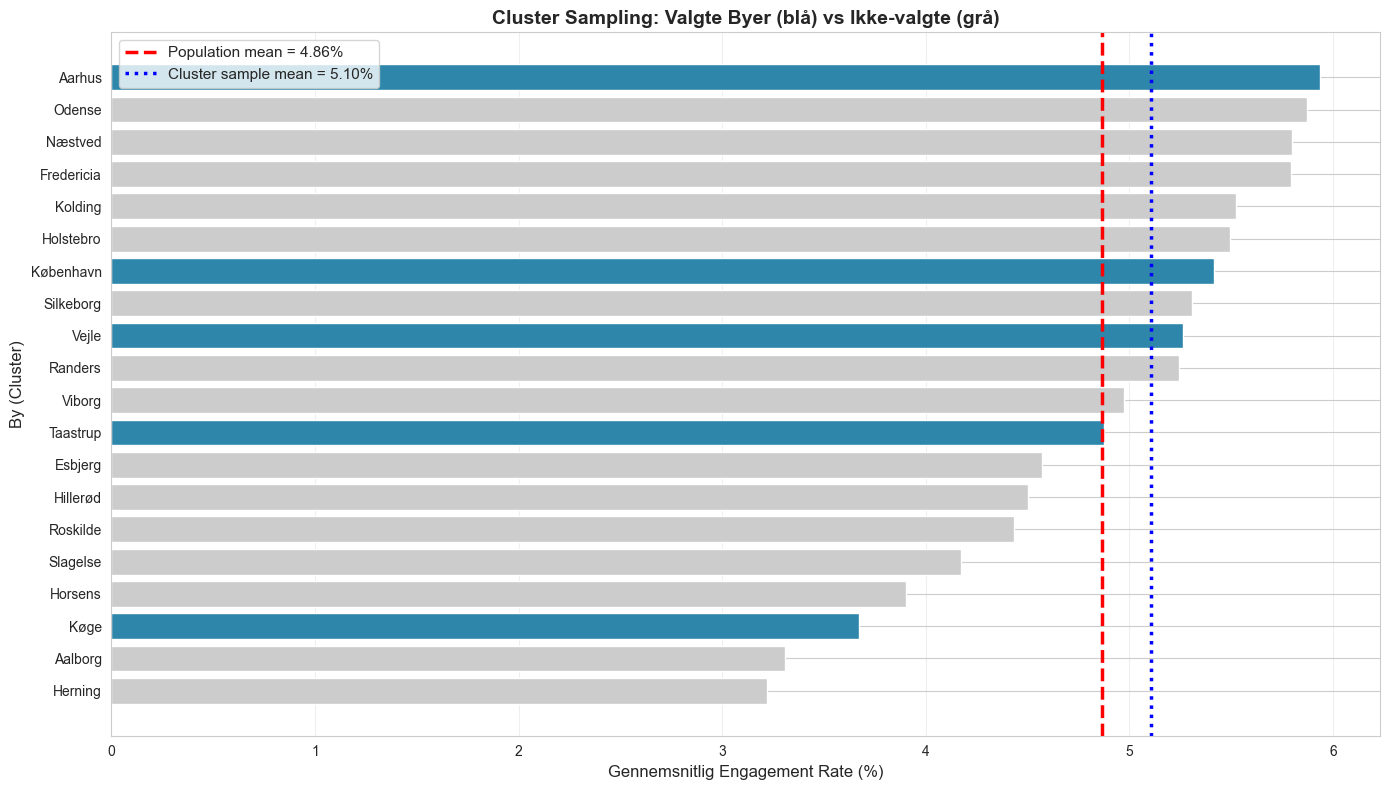

→ Blå bars: Byer inkluderet i cluster sample
→ Grå bars: Byer IKKE inkluderet
→ Bemærk: Vi tager ALLE influencers fra de blå byer!


In [42]:
fig, ax = plt.subplots(figsize=(14, 8))

# Beregn mean engagement per by
city_means = df_cluster_pop.groupby('city')['engagement_rate'].mean().sort_values()

#Farv de valgte byer anderledes
colors = ['#2E86AB' if city in selected_cities else '#CCCCCC' 
          for city in city_means.index]

# Plot
bars = ax.barh(range(len(city_means)), city_means.values, color=colors)

# Tilføj by navne
ax.set_yticks(range(len(city_means)))
ax.set_yticklabels(city_means.index, fontsize=10)

# Tilføj population mean linje
ax.axvline(pop_mean_cluster, color='red', linestyle='--', linewidth=2.5,
           label=f'Population mean = {pop_mean_cluster:.2f}%')

# Tilføj sample mean linje
ax.axvline(cluster_sample_mean, color='blue', linestyle=':', linewidth=2.5,
           label=f'Cluster sample mean = {cluster_sample_mean:.2f}%')

ax.set_xlabel('Gennemsnitlig Engagement Rate (%)', fontsize=12)
ax.set_ylabel('By (Cluster)', fontsize=12)
ax.set_title('Cluster Sampling: Valgte Byer (blå) vs Ikke-valgte (grå)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("→ Blå bars: Byer inkluderet i cluster sample")
print("→ Grå bars: Byer IKKE inkluderet")
print("→ Bemærk: Vi tager ALLE influencers fra de blå byer!")

---
## SUMMARY & KEY TAKEAWAYS
---

### Hvad Har Vi Lært?

**1. Python Data Structures:**
- Lists kan ikke direkte bruge `.mean()`, `.std()`
- Konverter til `pd.Series()` for statistiske funktioner
- DataFrame kolonner ER allerede Series

**2. Randomness & Seeds:**
- Python bruger pseudorandom algoritmer
- Seeds giver reproducerbare resultater
- Brug `random_state` parameter i pandas

**3. Simple Random Sampling:**
- Baseline metode: `.sample(n=...)`
- Sampling error er uundgåelig
- Større samples → mindre error (diminishing returns)

**4. Stratified Random Sampling:**
- Brug når population har heterogene subgrupper
- Garanterer repræsentation fra alle strata
- Ofte mere præcis end simple random
- Implementer med explicit loop (exam-friendly)

**5. Cluster Sampling:**
- Brug når omkostninger/logistik dominerer
- Vælg hele clusters, inkludér alle observationer
- Billigere, men typisk mindre præcis
- Trade-off mellem cost og precision